In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle
try: 
    from sklearn.utils import safe_indexing
except:
    from sklearn.utils import _safe_indexing

from yellowbrick.classifier import discrimination_threshold
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport

In [2]:
model = LogisticRegression()
visualizer = ClassificationReport(model)

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
train_df.drop(columns=['Unnamed: 0'], inplace=True)
test_df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
train_df['pregame_eFG_difference'] = train_df['home_pregame_eFG'] - train_df['away_pregame_eFG']
train_df['pregame_eFGa_difference'] = train_df['home_pregame_eFG_allowed'] - train_df['away_pregame_eFG_allowed']
train_df['pregame_win_difference'] = train_df['home_pregame_win_percentage'] - train_df['away_pregame_win_percentage']
train_df['pregame_rebs_difference'] = train_df['home_pregame_rebound_percentage'] - train_df['away_pregame_rebound_percentage']

test_df['pregame_eFG_difference'] = test_df['home_pregame_eFG'] - test_df['away_pregame_eFG']
test_df['pregame_eFGa_difference'] = test_df['home_pregame_eFG_allowed'] - test_df['away_pregame_eFG_allowed']
test_df['pregame_win_difference'] = test_df['home_pregame_win_percentage'] - test_df['away_pregame_win_percentage']
test_df['pregame_rebs_difference'] = test_df['home_pregame_rebound_percentage'] - test_df['away_pregame_rebound_percentage']

In [4]:
# Create separate dataframes for the features and target variable so we can train the model
x_train = train_df.iloc[:,1:]
y_train = train_df['Home_Win'].values.reshape(-1,1)

#This will be used to test our performance
x_test = test_df.iloc[:,1:]
y_test = test_df['Home_Win'].values.reshape(-1,1)


In [5]:
x_train.head()

,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,month_December,month_February,month_January,month_March,month_November,pregame_eFG_difference,pregame_eFGa_difference,pregame_win_difference,pregame_rebs_difference
0,0.533333,0.474747,0.462644,0.666667,0.546000,0.527273,0.427386,1.000000,0,0,0,0,1,0.012667,-0.035258,0.333333,0.052525
1,0.557927,0.518621,0.459565,0.818182,0.557072,0.526846,0.502378,0.714286,1,0,0,0,0,-0.000855,0.042814,-0.103896,0.008225
2,0.541306,0.515098,0.473576,0.730769,0.539457,0.524355,0.464958,0.923077,0,1,0,0,0,-0.001849,-0.008618,0.192308,0.009258
3,0.546021,0.521249,0.466043,0.777778,0.536078,0.492695,0.538396,0.368421,0,0,1,0,0,-0.009943,0.072353,-0.409357,-0.028554
4,0.537612,0.519357,0.467428,0.761905,0.542275,0.579537,0.451074,0.772727,0,1,0,0,0,0.004663,-0.016354,0.010823,0.060180


In [7]:
x_train.drop(columns=['month_March', 'month_November', 'month_December', 'month_February', 'month_January'], inplace=True)
#x_train.drop(x_train.columns.difference(['pregame_eFG_difference','pregame_eFGa_difference', 'pregame_rebs_difference', 'pregame_win_difference', 'month_December', 'month_February', 'month_January', 'month_March', 'month_November']), 1, inplace=True)


In [8]:
x_test.drop(columns=['month_March', 'month_November', 'month_December', 'month_February', 'month_January'], inplace=True)

#x_test.drop(x_test.columns.difference(['pregame_eFG_difference','pregame_eFGa_difference', 'pregame_rebs_difference', 'pregame_win_difference', 'month_December', 'month_February', 'month_January', 'month_March', 'month_November']), 1, inplace=True)

In [9]:
x_train.head()

,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,pregame_eFG_difference,pregame_eFGa_difference,pregame_win_difference,pregame_rebs_difference
0,0.533333,0.474747,0.462644,0.666667,0.546000,0.527273,0.427386,1.000000,0.012667,-0.035258,0.333333,0.052525
1,0.557927,0.518621,0.459565,0.818182,0.557072,0.526846,0.502378,0.714286,-0.000855,0.042814,-0.103896,0.008225
2,0.541306,0.515098,0.473576,0.730769,0.539457,0.524355,0.464958,0.923077,-0.001849,-0.008618,0.192308,0.009258
3,0.546021,0.521249,0.466043,0.777778,0.536078,0.492695,0.538396,0.368421,-0.009943,0.072353,-0.409357,-0.028554
4,0.537612,0.519357,0.467428,0.761905,0.542275,0.579537,0.451074,0.772727,0.004663,-0.016354,0.010823,0.060180


In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
features= ['pregame_eFG_difference', 'pregame_eFGa_difference', 'pregame_win_difference', 'pregame_rebs_difference']

# Apply transformations to the features we need to standardize. Makes the model better
#x_train[features]= ss.fit_transform(x_train[features])
#x_test[features]= mm.fit_transform(x_test[features])

In [11]:
x_train.describe()

,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,pregame_eFG_difference,pregame_eFGa_difference,pregame_win_difference,pregame_rebs_difference
count,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000,8397.000000
mean,0.502263,0.503658,0.497293,0.493792,0.514584,0.516593,0.484463,0.597264,0.012321,-0.012831,0.103472,0.012935
std,0.040307,0.038031,0.039694,0.221019,0.038579,0.037074,0.039110,0.215671,0.051873,0.050497,0.269440,0.049861
min,0.198529,0.272727,0.245763,0.000000,0.281818,0.264706,0.163265,0.000000,-0.408681,-0.441259,-1.000000,-0.272796
25%,0.480144,0.480851,0.474378,0.333333,0.490431,0.493151,0.462580,0.458333,-0.018464,-0.041195,-0.057692,-0.016465
50%,0.503047,0.502667,0.497396,0.500000,0.514056,0.515362,0.486170,0.600000,0.010988,-0.010783,0.086957,0.012128
75%,0.526756,0.526631,0.520695,0.636364,0.537701,0.539568,0.508772,0.750000,0.041041,0.017218,0.266667,0.042114
max,0.798387,0.732558,0.798387,1.000000,0.777027,0.763889,0.686441,1.000000,0.476909,0.323810,1.000000,0.397692


In [27]:
train_df['Home_Win'].value_counts()

# Home wins are 5391 and losses are 3006. 8397 total samples.
# weight of wins columns is 0.77 (samples divided by (2*number of wins))
# weight of loss column is 1.396
#weight_loss = (len(train_df['Home_Win'])) / (2 * len(train_df[train_df['Home_Win'] == 0]))
#weight_win = (len(train_df['Home_Win'])) / (2 * len(train_df[train_df['Home_Win'] == 1]))
#weights = {0:weight_loss, 1:weight_win}
#print('loss: ', weight_loss, '    win: ' , weight_win)
model = NuSVC(gamma='auto', probability=True)
model.fit(x_train, y_train.ravel())

NuSVC(gamma='auto', probability=True)

In [ ]:

from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.model_selection import train_test_split as tts

visualizer = PrecisionRecallCurve(RidgeClassifier(random_state=0))
visualizer.fit(x_train, y_train.ravel())
visualizer.score(x_test, y_test.ravel())
visualizer.show()

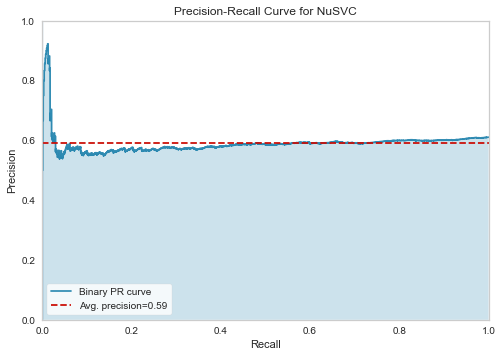

<AxesSubplot:title={'center':'Precision-Recall Curve for NuSVC'}, xlabel='Recall', ylabel='Precision'>

In [14]:
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve

visualizer = PrecisionRecallCurve(NuSVC(gamma='auto'))
visualizer.fit(x_train, y_train.ravel())
visualizer.score(x_test, y_test.ravel())
visualizer.show()

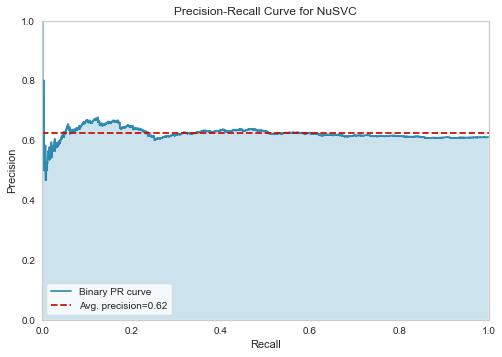

<AxesSubplot:title={'center':'Precision-Recall Curve for NuSVC'}, xlabel='Recall', ylabel='Precision'>

In [15]:
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve

visualizer = PrecisionRecallCurve(NuSVC(gamma='auto'))
visualizer.fit(x_train, y_train.ravel())
visualizer.score(x_test, y_test.ravel())
visualizer.show()

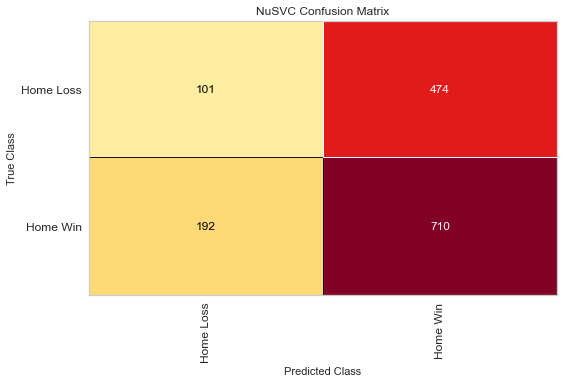

<AxesSubplot:title={'center':'NuSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [18]:
from yellowbrick.classifier import ConfusionMatrix

#model = NuSVC(gamma='auto', class_weight=weights)
cm = ConfusionMatrix(model, classes=['Home Loss', 'Home Win'])

cm.fit(x_train, y_train.ravel())
cm.score(x_test, y_test.ravel())
cm.show()

# The model predicted 546 wins for the home team and 931 losses.
#   It's likely overcompensating for weight that I put in
# It was fairly precise (65% of its predicted wins were, in fact, wins - True Positives)
# Its recall was pretty weak (only capturing 38.5% of all wins)
# It fell apart on the losses (58% of its predicted losses ended up being wins - False Negatives)

# F1 score = 2 * ((precision * recall) / (precision + recall)) = 0.48. No bueno (we want nearly 1)



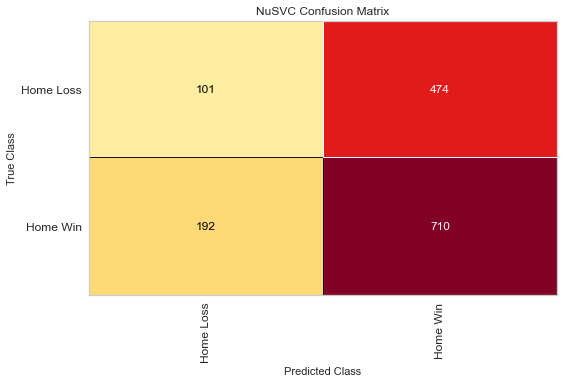

<AxesSubplot:title={'center':'NuSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [20]:
from yellowbrick.classifier import ConfusionMatrix

model = NuSVC(gamma='auto')
cm = ConfusionMatrix(model, classes=['Home Loss', 'Home Win'])

cm.fit(x_train, y_train.ravel())
cm.score(x_test, y_test.ravel())
cm.show()

# F1 score = 2 * ((precision * recall) / (precision + recall)) = 0.48. No bueno (we want nearly 1)

In [ ]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model, classes=["Home Loss", "Home Win"])

visualizer.fit(x_train, y_train.ravel())        # Fit the training data to the visualizer
visualizer.score(x_test, y_test.ravel())        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

# We are playing with very thin margins here. Ideally you want a high true positive and low false positive (almost a right angle)

In [22]:
x_test.describe()

,away_pregame_eFG,away_pregame_rebound_percentage,away_pregame_eFG_allowed,away_pregame_win_percentage,home_pregame_eFG,home_pregame_rebound_percentage,home_pregame_eFG_allowed,home_pregame_win_percentage,pregame_eFG_difference,pregame_eFGa_difference,pregame_win_difference,pregame_rebs_difference
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,0.504413,0.503693,0.497302,0.496970,0.515603,0.516458,0.486119,0.596879,0.011190,-0.011182,0.099909,0.012765
std,0.039705,0.037884,0.039593,0.220260,0.038680,0.038671,0.039503,0.220235,0.051684,0.050226,0.277080,0.051232
min,0.303922,0.352000,0.255556,0.000000,0.303571,0.363636,0.206897,0.000000,-0.265181,-0.419492,-1.000000,-0.191056
25%,0.481693,0.482277,0.474810,0.344828,0.493265,0.491323,0.463551,0.444444,-0.019776,-0.039044,-0.057143,-0.017929
50%,0.503932,0.503289,0.498282,0.500000,0.514493,0.515517,0.487819,0.600000,0.011335,-0.009826,0.096154,0.012244
75%,0.527149,0.525078,0.520518,0.642857,0.538462,0.541586,0.512500,0.750000,0.040078,0.017715,0.259259,0.041996
max,0.730159,0.746269,0.750000,1.000000,0.691667,0.722892,0.626866,1.000000,0.338725,0.308081,1.000000,0.277966


In [24]:
prob_prediction = model.predict_proba(x_test)

print(prob)

AttributeError: predict_proba is not available when  probability=False

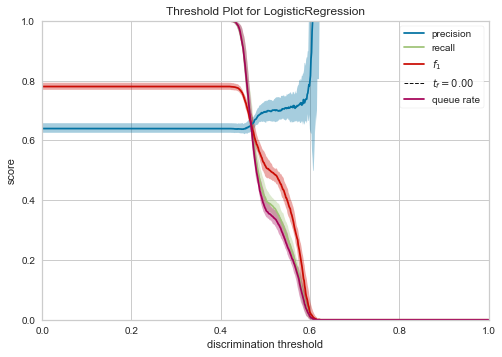

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [23]:
from yellowbrick.classifier import DiscriminationThreshold

# Load a binary classification dataset

# Instantiate the classification model and visualizer
model = LogisticRegression(class_weight=weights)
visualizer = DiscriminationThreshold(model)

visualizer.fit(x_train, y_train.ravel())        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

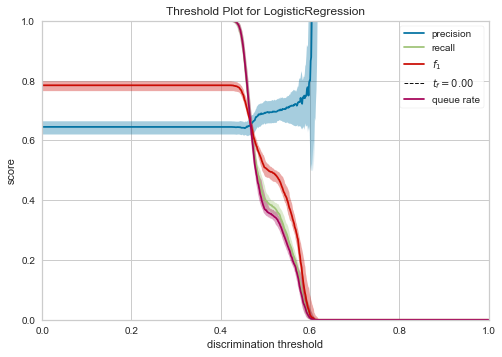

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [41]:
from yellowbrick.classifier import DiscriminationThreshold

# Load a binary classification dataset

# Instantiate the classification model and visualizer
model = LogisticRegression(class_weight=weights)
visualizer = DiscriminationThreshold(model)

visualizer.fit(x_train, y_train.ravel())        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

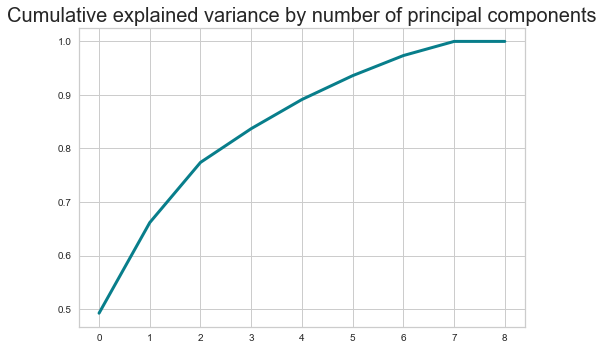

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA().fit(x_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

# This tells us that 100% of the variance in our model can be explained by just 4 features

# latest version, we see that .65 of variance is still in PC1, but
# there are more contributing PCs

In [25]:

loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(x_train.columns) + 1)],
    index=x_train.columns
)
loadings.head(10)

# Each PC in this output is a step along the x axis. So PC1 handles 55% of our variance in the dataset
# within PC1, Month_January is .38 correlated with PC1 and Feb is negatively correlated at .33
# PC2, 

# this is sketchy. The model is basically basing its entire output on month by month correlations of win percentage

# I bet that if I removed all the stats, the model would be the same

# new model with scaled pregame statistics, we have WAY more weight placed on the stats with month of the game 
# being more influential in PC5 & 6


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
month_December,0.025311,0.008286,0.010941,-0.007622,-0.015375,0.244896,-0.281951,-0.097025,1.458255e-15
month_February,-0.020439,0.014593,-0.000865,-0.068947,-0.333473,-0.264554,-0.025011,-0.056461,1.458255e-15
month_January,-0.022689,-0.003841,-0.019622,0.051487,0.377408,-0.215701,-0.019388,-0.054226,1.458255e-15
month_March,-0.014615,-0.000706,-0.001728,-0.001330,-0.006509,0.053387,0.012538,0.315092,1.458255e-15
month_November,0.032431,-0.018332,0.011274,0.026412,-0.022050,0.181973,0.313812,-0.107380,1.458255e-15
pregame_eFG_difference,0.657165,0.713903,0.070132,0.229957,-0.025609,-0.011160,-0.002468,0.003316,4.525211e-31
pregame_eFGa_difference,-0.743597,0.509080,-0.351543,-0.249820,0.033849,0.024104,0.016563,-0.005113,-2.715126e-31
pregame_win_difference,0.884513,0.063814,0.181416,-0.420028,0.064122,0.003449,0.014916,0.001594,3.620168e-31
pregame_rebs_difference,0.765079,-0.191431,-0.613126,0.044062,-0.015634,0.000766,-0.004006,0.001004,9.050421e-32


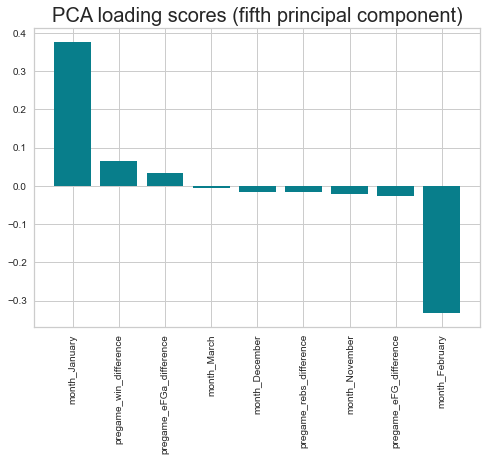

In [27]:
pc1_loadings = loadings.sort_values(by='PC5', ascending=False)[['PC5']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC5']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC5'], color='#087E8B')
plt.title('PCA loading scores (fifth principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [2]:
x_train.describe()

NameError: name 'x_train' is not defined

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight=weights)
model.fit(x_train, y_train.ravel())
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

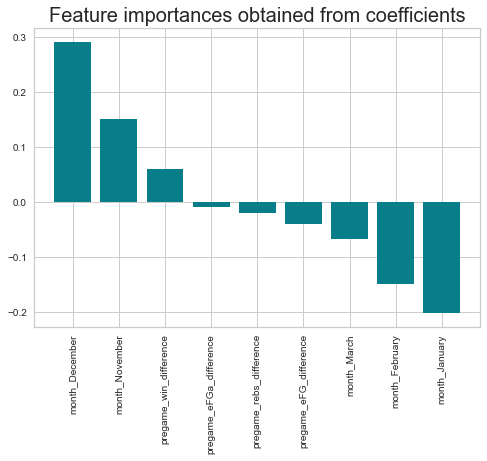

In [29]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [14]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport

# All unweighted models, FYI
models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3),
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=300),
    RandomForestClassifier(n_estimators=300)
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y
    predicted = model.predict(X)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

for model in models:
    score_model(x_train, y_train.ravel(), model)

SVC: 0.7819843342036553
NuSVC: 0.7954843261767967
LinearSVC: 0.9994435169727324
SGDClassifier: 0.9996289424860854
KNeighborsClassifier: 0.7855103497501785


C:\Users\mason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.9979625856640119


C:\Users\mason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV: 0.7819843342036553
BaggingClassifier: 0.972972972972973
ExtraTreesClassifier: 0.9998145400593472
RandomForestClassifier: 0.9998145400593472


C:\Users\mason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


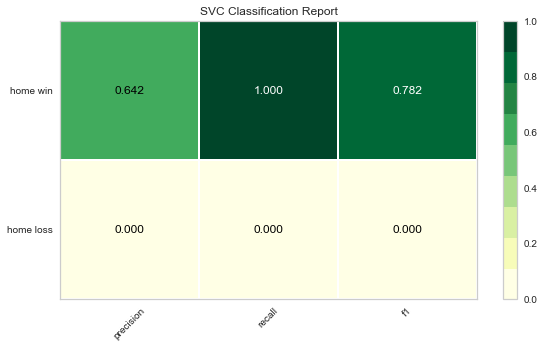

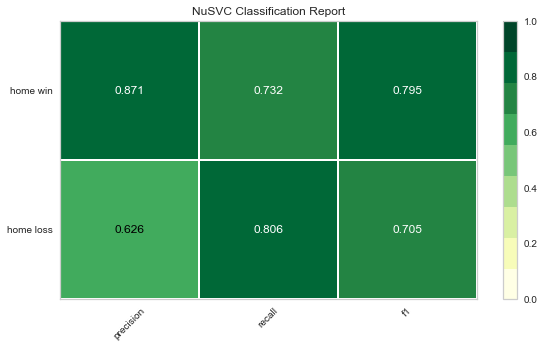

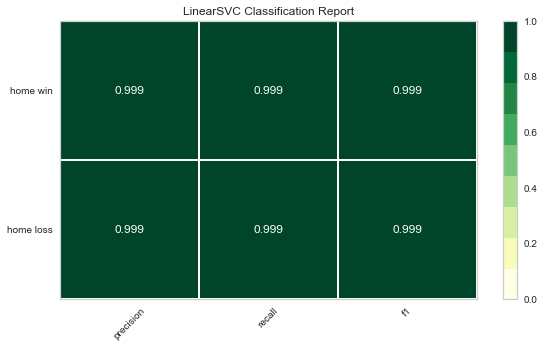

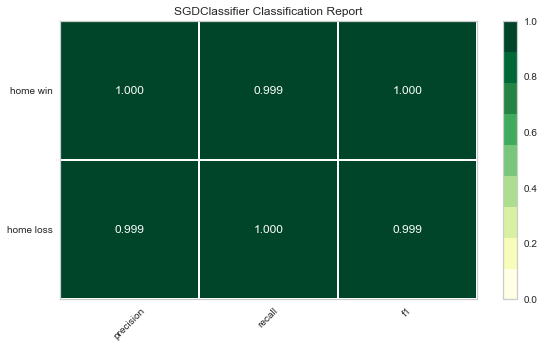

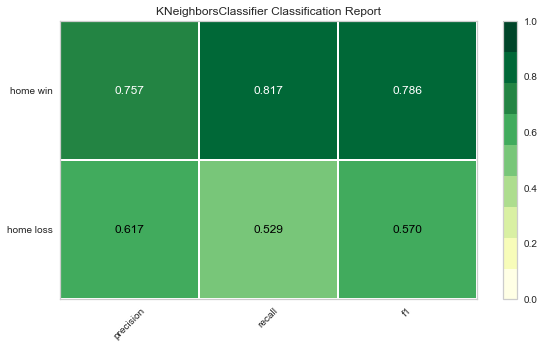

C:\Users\mason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


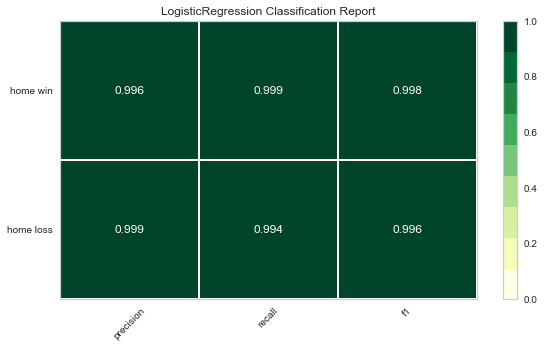

C:\Users\mason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

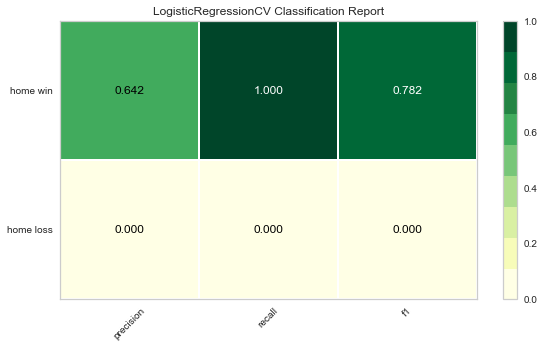

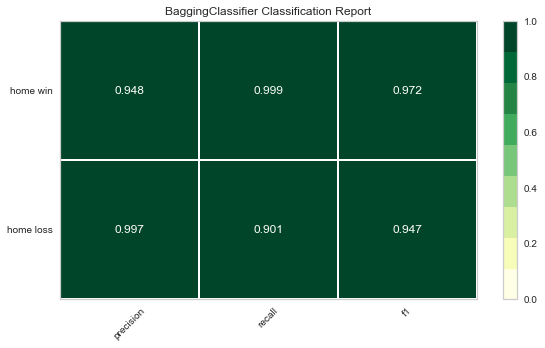

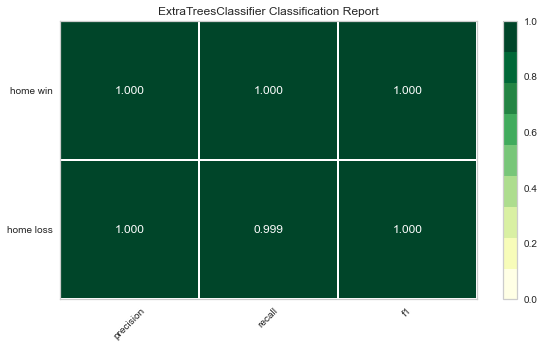

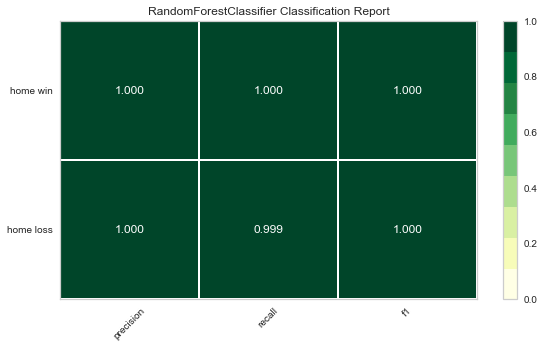

In [17]:
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visualize_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y)
    model = Pipeline([
        ('one_hot_encoder', OneHotEncoder()),
        ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, classes=['home loss', 'home win'],
        cmap="YlGn", size=(600, 360), **kwargs
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)
    visualizer.show()

for model in models:
    visualize_model(x_train, y_train.ravel(), model)

In [32]:
model = LogisticRegression()
model.fit(x_train, y_train)

probability_df = pd.DataFrame(model.predict_proba(x_test), columns=['Home_Loss', 'Home_Win'])
probability_df.describe()

C:\Users\mason\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Home_Loss,Home_Win
count,1477.000000,1477.000000
mean,0.358163,0.641837
std,0.018275,0.018275
min,0.282119,0.555458
25%,0.345361,0.629432
50%,0.357644,0.642356
75%,0.370568,0.654639
max,0.444542,0.717881
